## Prediction of medical Insurance cost using Python (Linear Regression) 

**Problem Statement:** Predicting insurance cost of people based on available data set features.

**Source:** Kaggle Dataset

**Data Set Information:**
The dataset contains features like age of primary beneficiary, Body mass index, objective index of body weight, children, smoker, region etc.

**Model Building and Training:** 
This is a Regression dataset. We are building a Machine Learning model using Linear regression.

* Data Collection
* Data Analysis (finding relation among the data set)
* Data Preprocessing (data will be compatible to feed)
* Split dataset into training & test data 

Model is first trained with training dataset. The model is further tested with sample test data and the accuracy of the model was evaluated.



In [2]:
#importing the libraries
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#loadding the data from csv file to pandas dataframe
insurance_dataset = pd.read_csv(r"C:\Nirzari\Project\Regression\reg dataset\medical insurance\insurance.csv")

In [4]:
#first 5 rows of dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### categorical features
* sex
* smoker
* region

In [9]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Data Analysis

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


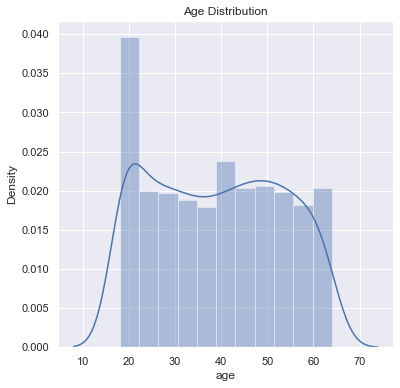

In [11]:
#Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

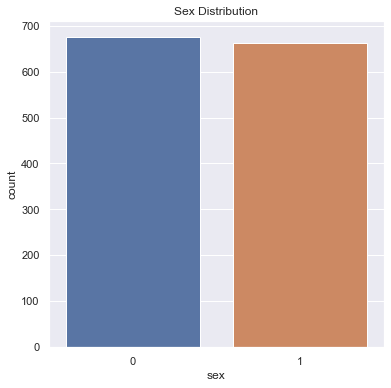

In [14]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [15]:
insurance_dataset['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

#### BMI DISTRIBUTION

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


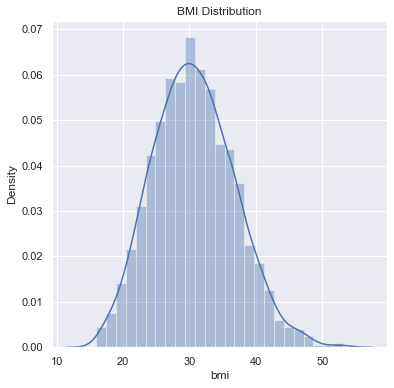

In [17]:
#BMI DISTRIBUTION
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

##### Normal BMI Range--->18.5 to 24.9

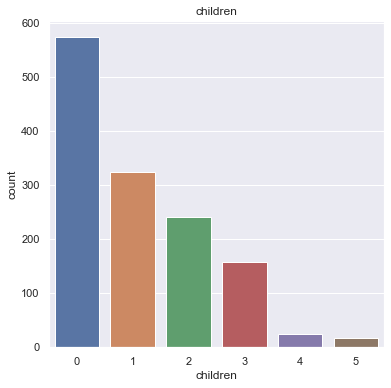

In [18]:
#Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

#### Smoker column

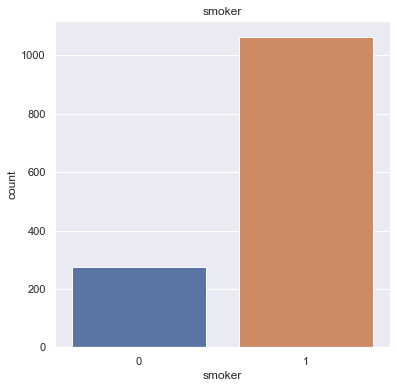

In [20]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [21]:
insurance_dataset['smoker'].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

##### region column

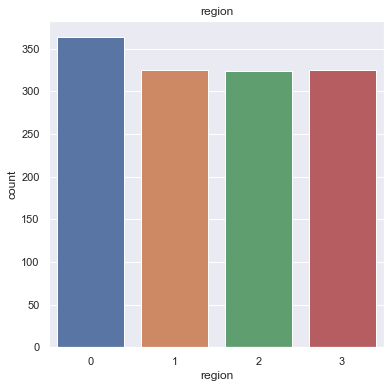

In [22]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [23]:
insurance_dataset['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


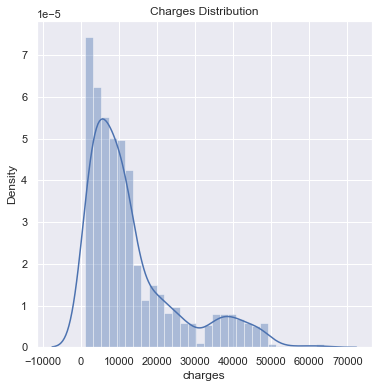

In [24]:
#BMI DISTRIBUTION
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### DATA PREPROCESSING

##### ENCODING THE CATEGORICAL VALUE

In [ ]:
#ENCODING THE SEX COLUMN
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding the region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


#### Splitting the features and targets


In [25]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']


In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
#SPLITTING THE DATA INTO TRAINING AND TESTING DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#### MODEL TRAINING
* LINEAR REGRESSION

In [31]:
#Loading the Linear Regression model
regressor = LinearRegression()

In [32]:
regressor.fit(X_train, Y_train)

LinearRegression()

#### MODEL Evaluation

In [34]:
training_data_prediction =regressor.predict(X_train)

In [35]:
#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)


R squared value: 0.751505643411174


In [36]:
test_data_prediction = regressor.predict(X_test)

In [37]:
#R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


In [39]:
#Build a predictive system
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped =  input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496046
